# Notebook to Look at SMELT results 
after removing bizarre negative code

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [8]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [27]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/ocean/sallen/allen/research/MEOPAR/myResults/nowcast-green/SMELTbase/'
date = datetime.datetime(2016, 2, 9)
ptrc_T = results_dataset(final, date, 2, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][47,:,:,:]

initial = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/initial_green/BioIC_SMELT_v1.nc'
ni = nc.Dataset(initial)
nitrate0 = ni.variables['NO3'][0,:]

odict_keys(['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])
/ocean/sallen/allen/research/MEOPAR/myResults/nowcast-green/SMELTbase/SalishSea_1h_20160209_20160210_ptrc_T.nc
(40, 898, 398)


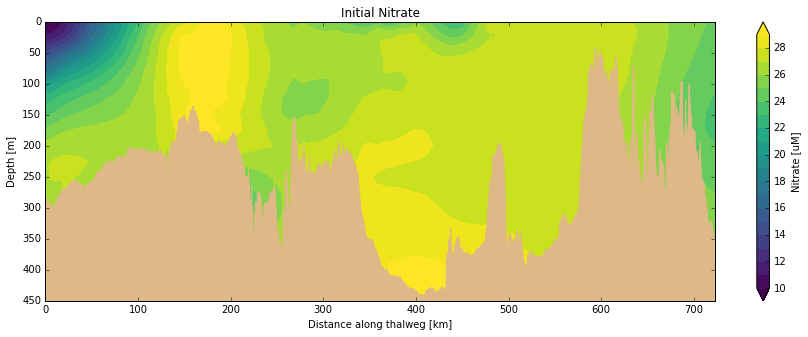

In [40]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(10., 30., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Initial Nitrate')

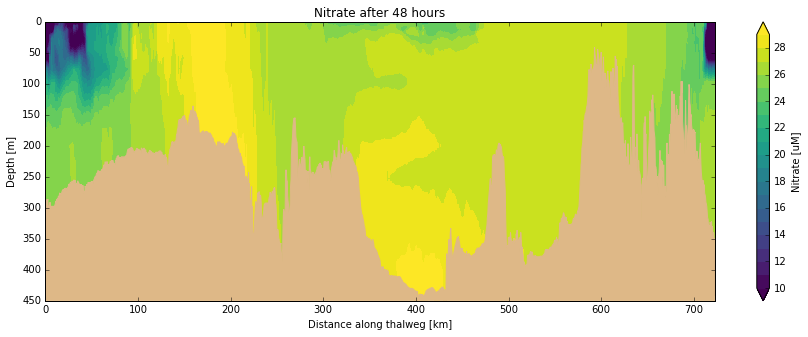

In [41]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Nitrate after 48 hours')

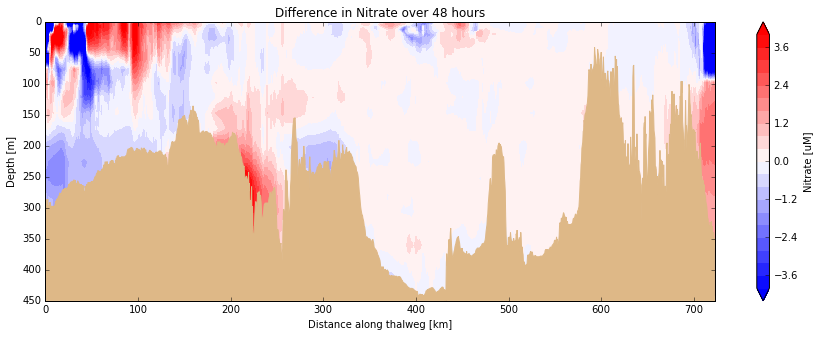

In [42]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(-4, 4.4, 0.4)
cbar = vis.contour_thalweg(ax, nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Difference in Nitrate over 48 hours')